### Data Set Information:

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.


### Data Source:
https://archive.ics.uci.edu/ml/datasets/wine

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('wine.xls',names=['Type','Alcohol','Malic acid', 'Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
)

### EDA:

In [3]:
data.head()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.shape

(178, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Type                          178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [6]:
# original clusters:
data['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [7]:
# missing values:
data.isnull().sum()

Type                            0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [8]:
# skewness:
data.skew().sort_values(ascending=False)

Magnesium                       1.098191
Malic acid                      1.039651
Color intensity                 0.868585
Proline                         0.767822
Proanthocyanins                 0.517137
Nonflavanoid phenols            0.450151
Alcalinity of ash               0.213047
Type                            0.107431
Total phenols                   0.086639
Flavanoids                      0.025344
Hue                             0.021091
Alcohol                        -0.051482
Ash                            -0.176699
OD280/OD315 of diluted wines   -0.307285
dtype: float64

In [ ]:
# very less skewness

<Figure size 1224x576 with 0 Axes>

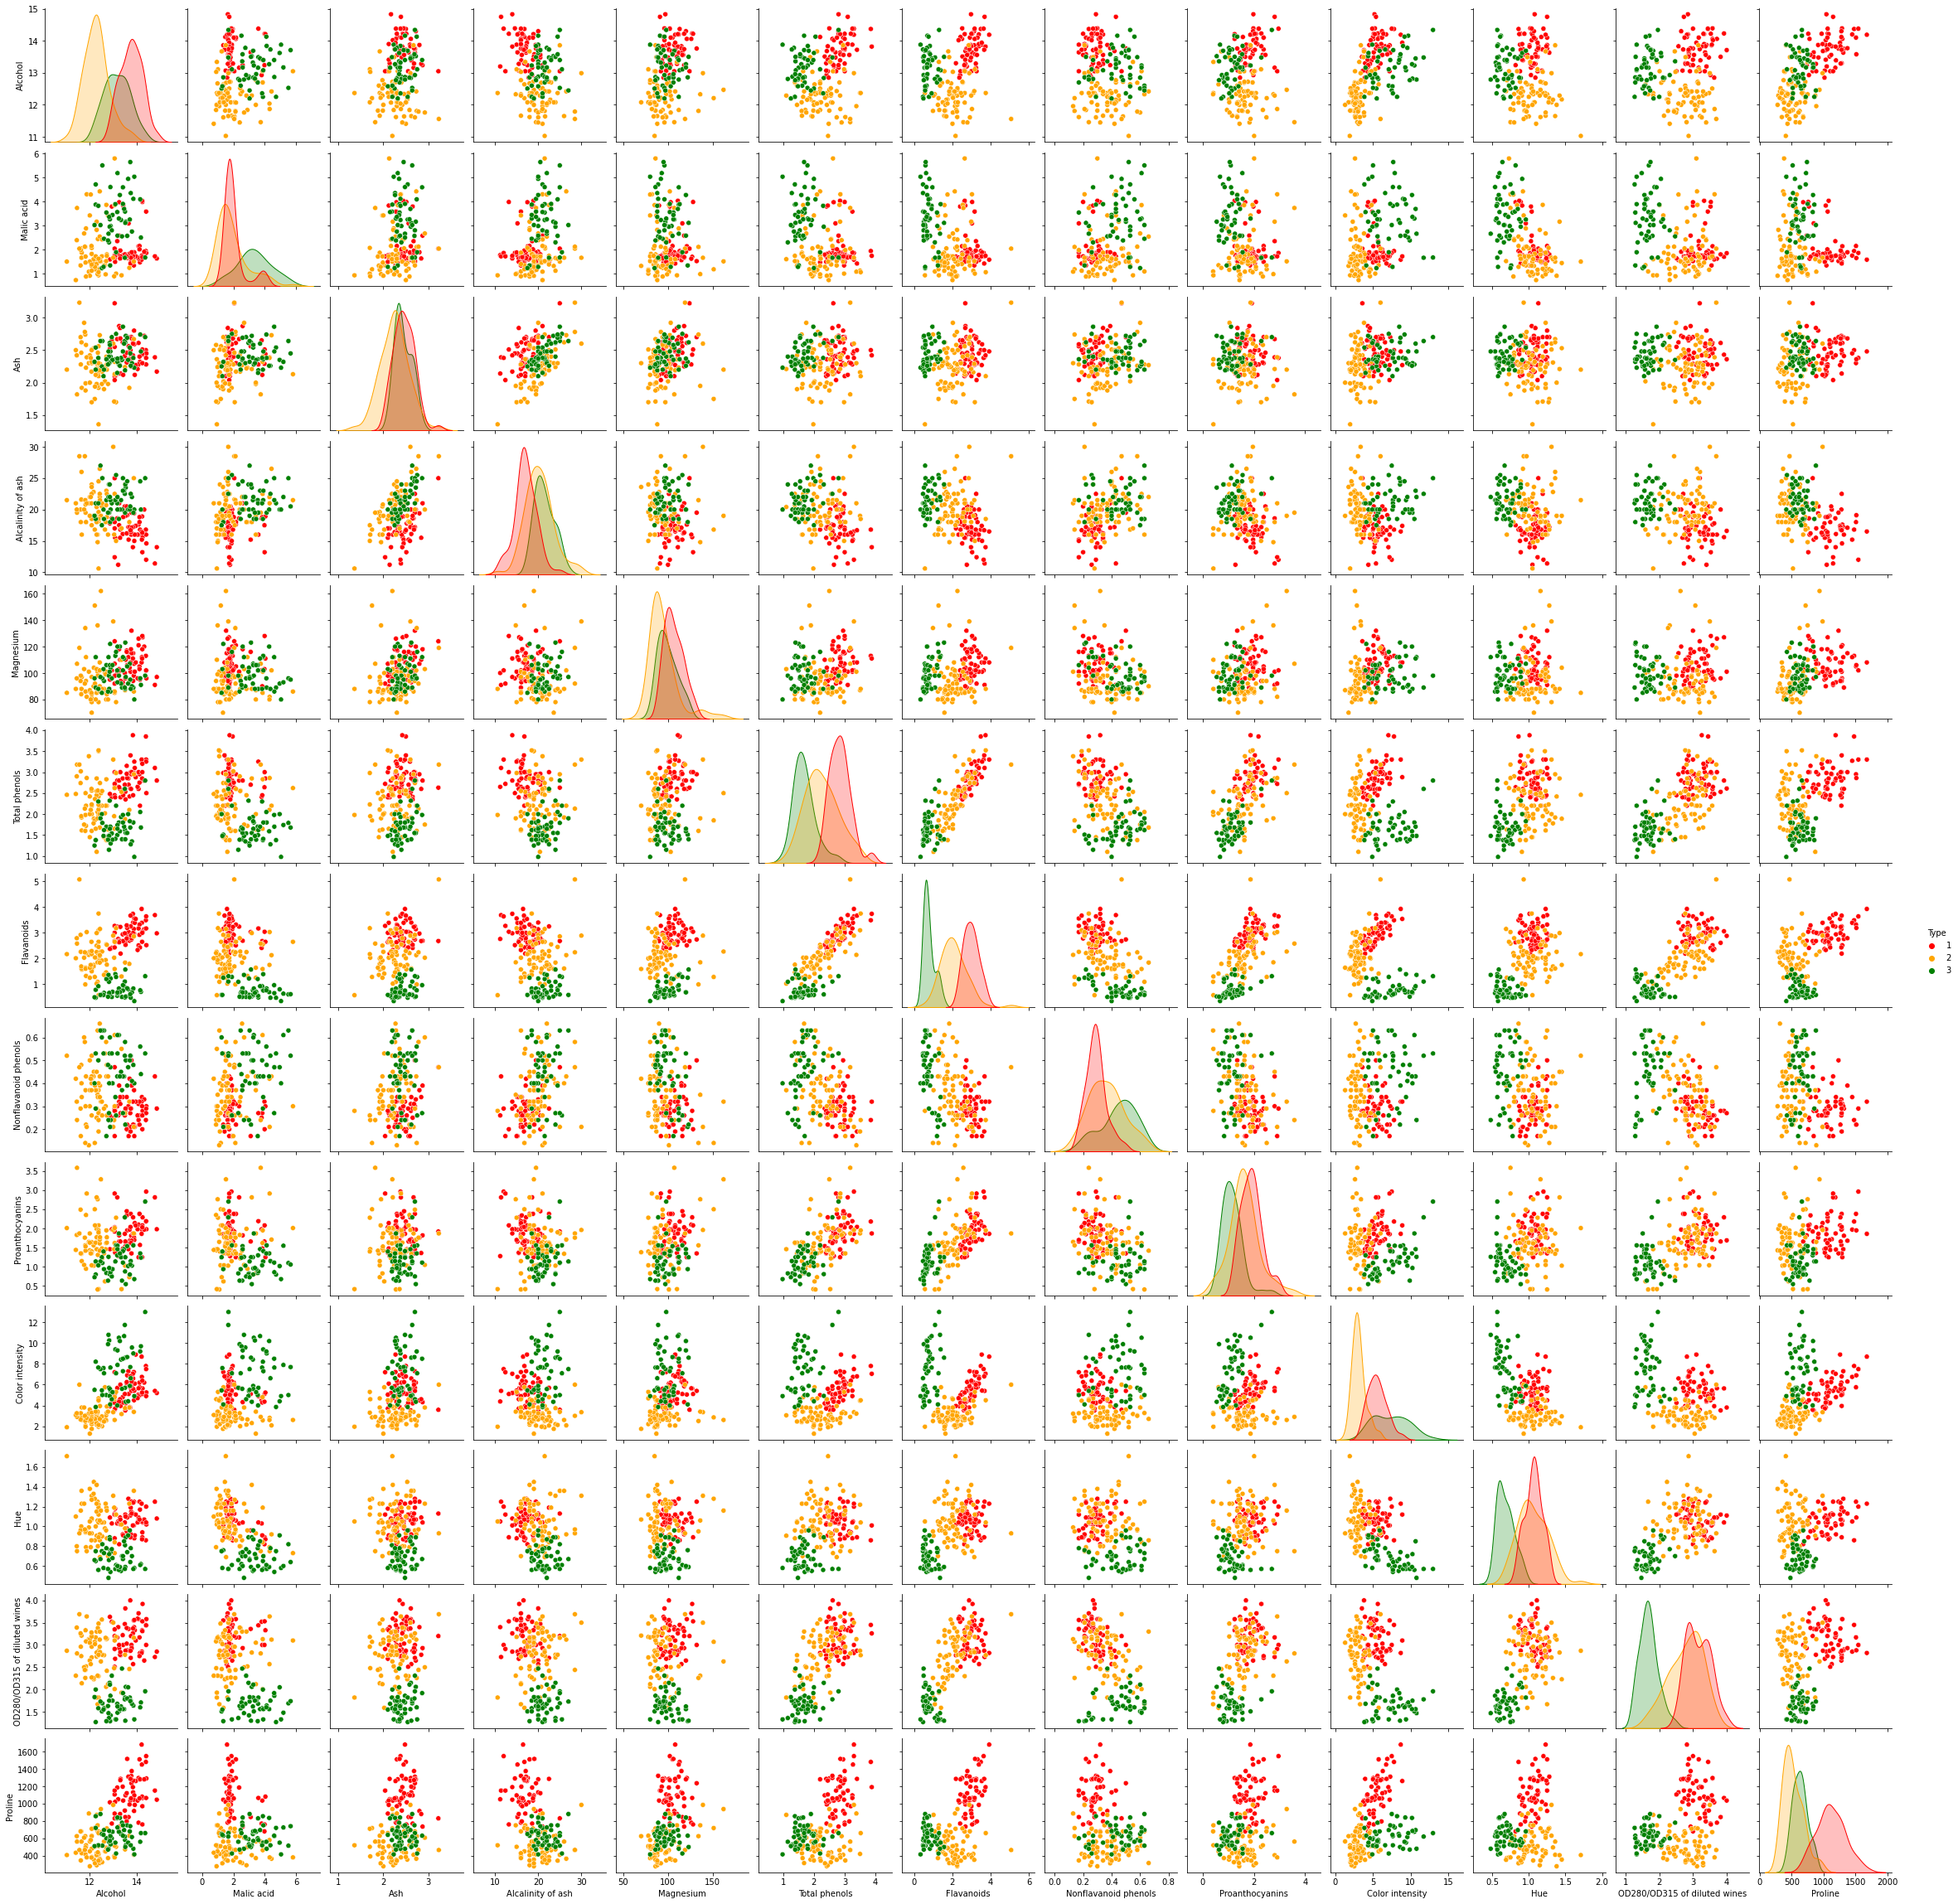

In [28]:
plt.figure(figsize=(17,8))
sns.pairplot(data, hue = 'Type', diag_kind= 'kde', palette = ['red','orange','green'])

<AxesSubplot:>

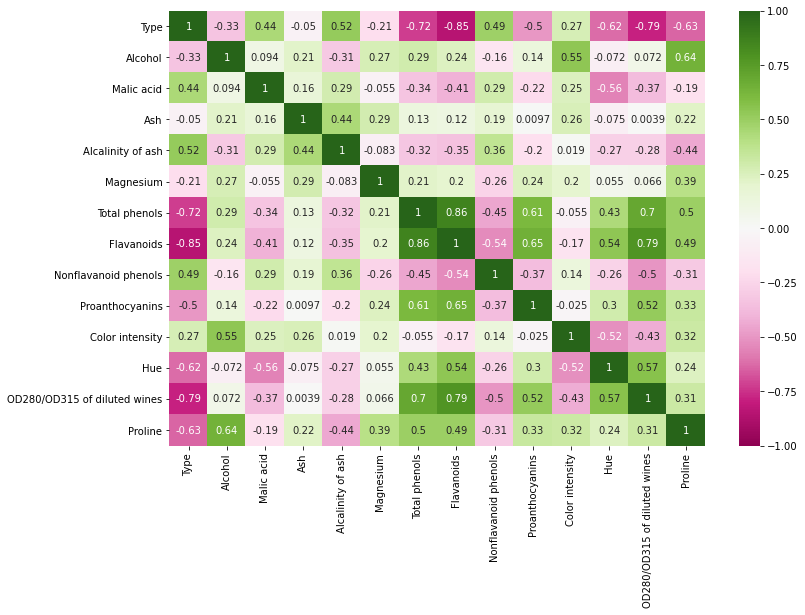

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap ='PiYG', vmin = -1, vmax = 1)

In [10]:
x = data.drop('Type', axis=1)
y = data['Type']

In [11]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

x_sc = pd.DataFrame(ss.fit_transform(x), columns = x.columns)
x_sc.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


## Kmeans and Agglomerative Clustering without PCA on scaled data:

### KMeans:

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [13]:
num = range(1,11)
err = []

for i in num:
    model = KMeans(i)
    model.fit(x_sc)
    err.append(model.inertia_)

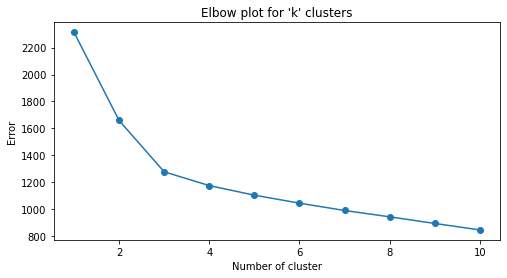

In [14]:
plt.figure(figsize=(8,4))
plt.plot(num, err, marker='o');
plt.xlabel('Number of cluster');
plt.ylabel('Error');
plt.title("Elbow plot for 'k' clusters");

In [15]:
from yellowbrick.cluster import SilhouetteVisualizer

silhouette score for 2 cluster is: 0.2683


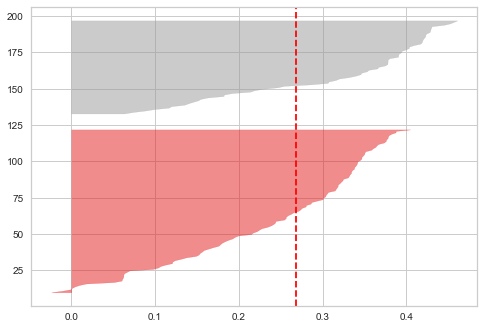

silhouette score for 3 cluster is: 0.2849


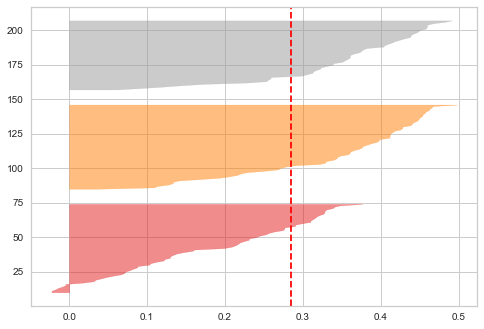

silhouette score for 4 cluster is: 0.2515


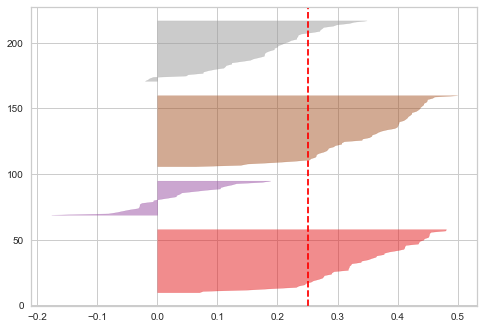

silhouette score for 5 cluster is: 0.2458


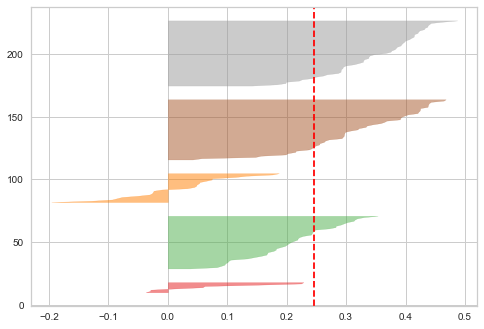

silhouette score for 6 cluster is: 0.1956


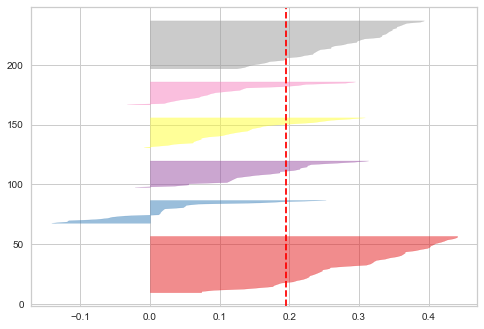

In [16]:
num = [2,3,4,5,6]

for i in num:
    model = KMeans(i)
    model.fit(x_sc)
    score = silhouette_score(x_sc, model.labels_)
    print(f'silhouette score for {i} cluster is: {round(score,4)}')
    v = SilhouetteVisualizer(model)
    v.fit(x_sc)
    plt.show()

In [ ]:
# optimal is k=3

In [17]:
km = KMeans(n_clusters= 3)
km.fit(x_sc)
km_labels = km.predict(x_sc)

In [18]:
centroids = km.cluster_centers_

In [19]:
df_sc_km = x_sc.copy()
df_sc_km['labels'] = km_labels
df_sc_km.head(2)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,labels
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,2
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2


## Agglomerative

In [20]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from scipy.spatial.distance import pdist

In [21]:
c = [2,3,4]
link=['single','complete','average','ward']

for i in c:
    for l in link:
        cluster=AgglomerativeClustering(n_clusters=i,linkage=l)
        cluster.fit(x_sc)
        label = cluster.labels_
        score = silhouette_score(x_sc,label,random_state=10)
        print('The score of', i ,'clusters and',l,'linkage is ',score)
    
    print('\n')

The score of 2 clusters and single linkage is  0.22245060727650925
The score of 2 clusters and complete linkage is  0.16186821075824512
The score of 2 clusters and average linkage is  0.2591060736265412
The score of 2 clusters and ward linkage is  0.2670131771272231


The score of 3 clusters and single linkage is  0.18273797160972796
The score of 3 clusters and complete linkage is  0.20378689690677748
The score of 3 clusters and average linkage is  0.15752526243774145
The score of 3 clusters and ward linkage is  0.2774439826952265


The score of 4 clusters and single linkage is  0.1810782436950983
The score of 4 clusters and complete linkage is  0.19382526203175696
The score of 4 clusters and average linkage is  0.14900318238951352
The score of 4 clusters and ward linkage is  0.225836659334758




In [22]:
link = ['single', 'complete','average', 'ward', 'centroid']

for l in link:
    z = linkage(x_sc, method = l)
    coph, coph_dist = cophenet(z, pdist(x_sc))
    print('Cophenetic value for ', l , 'is: ', round(coph,4))

Cophenetic value for  single is:  0.5436
Cophenetic value for  complete is:  0.5917
Cophenetic value for  average is:  0.7591
Cophenetic value for  ward is:  0.6623
Cophenetic value for  centroid is:  0.7565


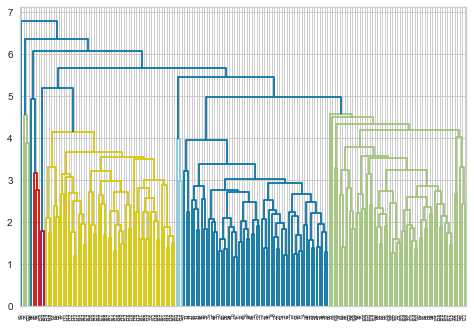

In [23]:
Z = linkage(x_sc, method ='average')
dendrogram(Z)
plt.show()

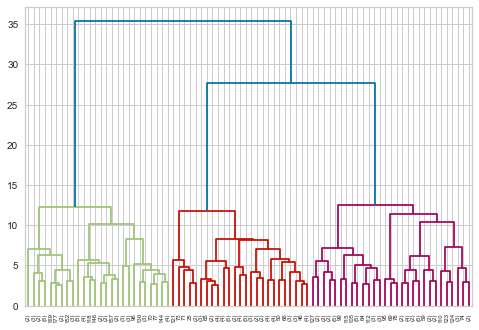

In [24]:
Z = linkage(x_sc, method ='ward')
dendrogram(Z, truncate_mode= 'lastp', p=80)
plt.show()

In [25]:
agg = AgglomerativeClustering(n_clusters= 3, linkage='ward')
agg_labels = agg.fit_predict(x_sc)

In [26]:
df_sc_agg = x_sc.copy()
df_sc_agg['labels'] = agg_labels
df_sc_agg.head(2)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,labels
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,2
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2


Text(0, 0.5, 'Proline')

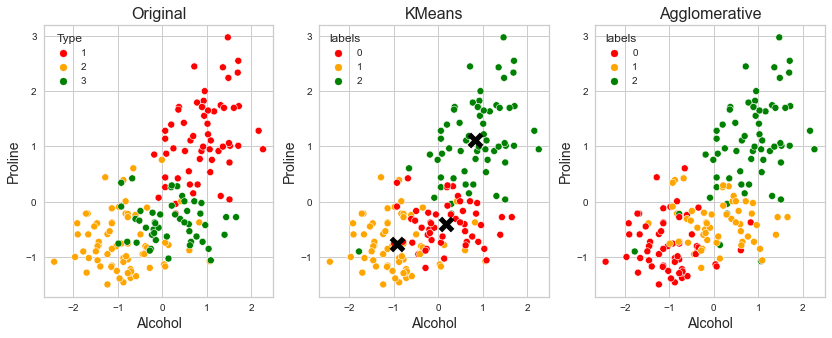

In [27]:
plt.figure(figsize=(14,5))

plt.subplot(1,3,1)
sns.scatterplot(x_sc['Alcohol'],x_sc['Proline'], hue = data['Type'], palette = ['red','orange','green'])
plt.title('Original', size =16)
plt.xlabel('Alcohol', size=14)
plt.ylabel('Proline', size=14)

plt.subplot(1,3,2)
sns.scatterplot(df_sc_km['Alcohol'],df_sc_km['Proline'], hue = df_sc_km['labels'], palette = ['red','orange','green'])
plt.scatter(centroids[:,0], centroids[:,12],  marker = "x", s=150, 
    linewidths = 5, zorder = 10, color ='black')
plt.title('KMeans', size =16)
plt.xlabel('Alcohol', size=14)
plt.ylabel('Proline', size=14)

plt.subplot(1,3,3)
sns.scatterplot(df_sc_agg['Alcohol'],df_sc_agg['Proline'], hue = df_sc_agg['labels'], palette = ['red','orange','green'])
plt.title('Agglomerative', size =16)
plt.xlabel('Alcohol', size=14)
plt.ylabel('Proline', size=14)


In [ ]:
# kmeans is doing better than agg as there is little less overlapping

## Kmeans and Agg with PCA using sklearn:

In [28]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA()
pca.fit(x_sc)

PCA()

In [30]:
exp_var = pca.explained_variance_

In [31]:
pca.explained_variance_*100

array([473.24369776, 251.10809296, 145.42418678,  92.41658668,
        85.80486765,  64.52822125,  55.41414662,  35.04662749,
        29.05120327,  25.23200104,  22.70642817,  16.9723739 ,
        10.39619918])

In [32]:
pca.explained_variance_ratio_*100

array([36.1988481 , 19.20749026, 11.12363054,  7.06903018,  6.56329368,
        4.93582332,  4.23867932,  2.68074895,  2.2221534 ,  1.93001909,
        1.73683569,  1.29823258,  0.79521489])

In [33]:
cum_var = np.cumsum(pca.explained_variance_ratio_)*100
cum_var

array([ 36.1988481 ,  55.40633836,  66.52996889,  73.59899908,
        80.16229276,  85.09811607,  89.3367954 ,  92.01754435,
        94.23969775,  96.16971684,  97.90655253,  99.20478511,
       100.        ])

In [34]:
pca.n_components_

13

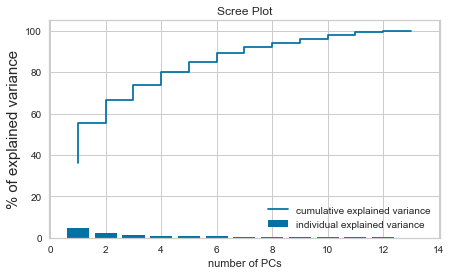

In [35]:
plt.figure(figsize=(7,4))
num = range(1,14)
plt.bar(num,exp_var, label='individual explained variance')
plt.step(num, cum_var, label='cumulative explained variance')
plt.title('Scree Plot');
plt.xlabel('number of PCs');
plt.ylabel('% of explained variance', size =15);
plt.legend(loc = 'best')
plt.show()

In [36]:
pca = PCA(n_components=10)
x_pca = pd.DataFrame(pca.fit_transform(x_sc), columns=['pc1','pc2', 'pc3', 'pc4','pc5', 'pc6', 'pc7','pc8','pc9','pc10'])
x_pca.head(3)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361


### PCA KMeans:

In [37]:
num = range(1,11)
err = []

for i in num:
    model = KMeans(i)
    model.fit(x_pca)
    err.append(model.inertia_)

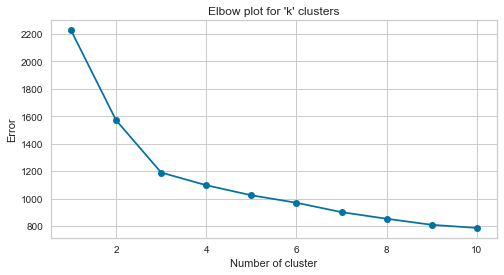

In [38]:
plt.figure(figsize=(8,4))
plt.plot(num, err, marker='o');
plt.xlabel('Number of cluster');
plt.ylabel('Error');
plt.title("Elbow plot for 'k' clusters");

In [39]:
num = [2,3,4,5,6]

for i in num:
    model = KMeans(i)
    model.fit(x_pca)
    score = silhouette_score(x_pca, model.labels_)
    print(f'silhouette score for {i} cluster is: {round(score,4)}')

silhouette score for 2 cluster is: 0.2697
silhouette score for 3 cluster is: 0.2987
silhouette score for 4 cluster is: 0.2612
silhouette score for 5 cluster is: 0.2619
silhouette score for 6 cluster is: 0.1939


In [ ]:
# optimal is k=3

In [40]:
km_pca = KMeans(n_clusters= 3)
km_pca.fit(x_pca)
km_pca_labels = km_pca.predict(x_pca)

In [41]:
centroids = km_pca.cluster_centers_

In [42]:
df_pca_km = x_pca.copy()
df_pca_km['labels'] = km_pca_labels
df_pca_km.head(2)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,labels
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.22388,0.596427,0.065139,0.641443,1.020956,0
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.92712,0.053776,1.024416,-0.308847,0.159701,0


### PCA Agglomerative:

In [43]:
c = [2,3,4]
link=['single','complete','average','ward']
score= []
for i in c:
    for l in link:
        cluster=AgglomerativeClustering(n_clusters=i,linkage=l)
        cluster.fit(x_pca)
        label = cluster.labels_
        score = silhouette_score(x_pca,label,random_state=10)
        print('The score of', i ,'clusters and',l,'linkage is ',score)
    
    print('\n')

The score of 2 clusters and single linkage is  0.2308490625690046
The score of 2 clusters and complete linkage is  0.2532975551820382
The score of 2 clusters and average linkage is  0.2639317816736075
The score of 2 clusters and ward linkage is  0.27203259421573656


The score of 3 clusters and single linkage is  0.18700851324567516
The score of 3 clusters and complete linkage is  0.22271041837351743
The score of 3 clusters and average linkage is  0.1492526401761123
The score of 3 clusters and ward linkage is  0.2839520778138407


The score of 4 clusters and single linkage is  0.16239219059344562
The score of 4 clusters and complete linkage is  0.1335563303534302
The score of 4 clusters and average linkage is  0.14569959827589218
The score of 4 clusters and ward linkage is  0.22505552510993893




In [45]:
link = ['single', 'complete','average', 'ward', 'centroid']

for l in link:
    z = linkage(x_pca, method = l)
    coph, coph_dist = cophenet(z, pdist(x_pca))
    print('Cophenetic value for ', l , 'is: ', round(coph,4))

Cophenetic value for  single is:  0.5346
Cophenetic value for  complete is:  0.6598
Cophenetic value for  average is:  0.7615
Cophenetic value for  ward is:  0.6637
Cophenetic value for  centroid is:  0.7604


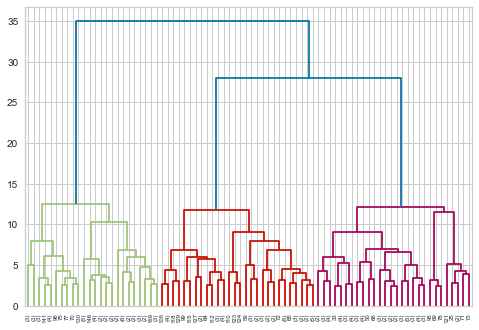

In [46]:
Z = linkage(x_pca, method ='ward')
dendrogram(Z, truncate_mode= 'lastp', p=80)
plt.show()

In [ ]:
# optimal k=3

In [47]:
agg_pca = AgglomerativeClustering(n_clusters= 3, linkage='ward')
agg_pca_labels = agg_pca.fit_predict(x_pca)

In [48]:
df_pca_agg = x_pca.copy()
df_pca_agg['labels'] = agg_pca_labels
df_pca_agg.head(2)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,labels
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.22388,0.596427,0.065139,0.641443,1.020956,1
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.92712,0.053776,1.024416,-0.308847,0.159701,1


Text(0, 0.5, 'Proline')

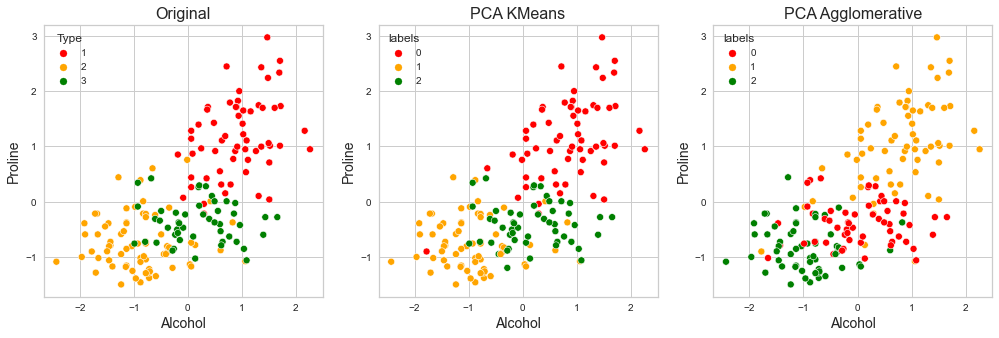

In [50]:
plt.figure(figsize=(17,5))

plt.subplot(1,3,1)
sns.scatterplot(x_sc['Alcohol'],x_sc['Proline'], hue = data['Type'], palette = ['red','orange','green'])
plt.title('Original', size =16)
plt.xlabel('Alcohol', size=14)
plt.ylabel('Proline', size=14)

plt.subplot(1,3,2)
sns.scatterplot(x_sc['Alcohol'],x_sc['Proline'], hue = df_pca_km['labels'], palette = ['red','orange','green'])
plt.title('PCA KMeans', size =16)
plt.xlabel('Alcohol', size=14)
plt.ylabel('Proline', size=14)

plt.subplot(1,3,3)
sns.scatterplot(x_sc['Alcohol'],x_sc['Proline'], hue = df_pca_agg['labels'], palette = ['red','orange','green'])
plt.title('PCA Agglomerative', size =16)
plt.xlabel('Alcohol', size=14)
plt.ylabel('Proline', size=14)


Text(0, 0.5, 'Proline')

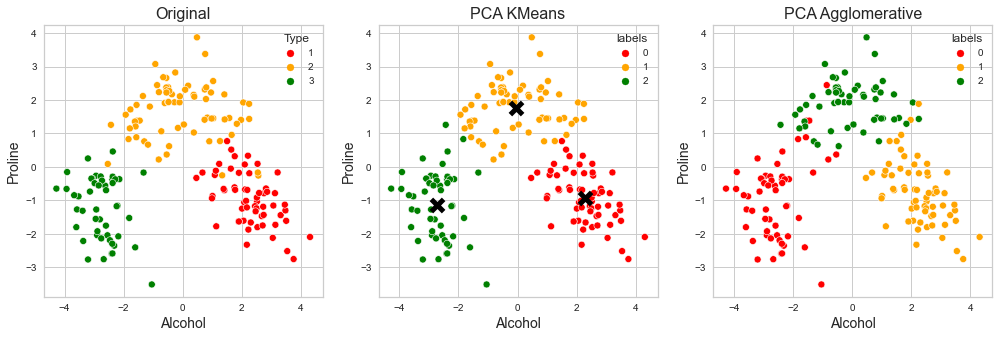

In [51]:
plt.figure(figsize=(17,5))

plt.subplot(1,3,1)
sns.scatterplot(x_pca['pc1'],x_pca['pc2'], hue = data['Type'], palette = ['red','orange','green'])
plt.title('Original', size =16)
plt.xlabel('Alcohol', size=14)
plt.ylabel('Proline', size=14)

plt.subplot(1,3,2)
sns.scatterplot(df_pca_km['pc1'],df_pca_km['pc2'], hue = df_pca_km['labels'], palette = ['red','orange','green'])
plt.scatter(centroids[:,0], centroids[:,1], marker = "x", s=150, 
    linewidths = 5, zorder = 10, color ='black')
plt.title('PCA KMeans', size =16)
plt.xlabel('Alcohol', size=14)
plt.ylabel('Proline', size=14)

plt.subplot(1,3,3)
sns.scatterplot(df_pca_agg['pc1'],df_pca_agg['pc2'], hue = df_pca_agg['labels'], palette = ['red','orange','green'])
plt.title('PCA Agglomerative', size =16)
plt.xlabel('Alcohol', size=14)
plt.ylabel('Proline', size=14)


In [ ]:
# in pca, kmeans is doing well. no overlapping and separation is good

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

## Build a classification model on original without kmeans, original with kmeans and  pca k-means clustering

In [53]:
# Original scaled data without kmeans
x = x_sc.copy()
y = data['Type']

In [54]:
# Original scaled data with kmeans
x1 = df_sc_km.drop('labels', axis=1)
y1 = df_sc_km['labels']

In [55]:
# PCA scaled data with kmeans
x2 = df_pca_km.drop('labels', axis=1)
y2 = df_pca_km['labels']

In [56]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state=10)
x1_train,x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size =0.2, random_state=10)
x2_train,x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size =0.2, random_state=10)

In [57]:
# Original scaled data without kmeans
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(x_train,y_train)

y_test_pred = dt.predict(x_test)

print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      0.89      0.94        18
           3       0.80      1.00      0.89         8

    accuracy                           0.94        36
   macro avg       0.93      0.96      0.94        36
weighted avg       0.96      0.94      0.95        36



In [58]:
# Original scaled data with kmeans
dt1 = DecisionTreeClassifier(max_depth=5)
dt1.fit(x1_train,y1_train)

y_test_pred1 = dt1.predict(x1_test)

print(classification_report(y1_test,y_test_pred1))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.93      0.81      0.87        16
           2       1.00      1.00      1.00        10

    accuracy                           0.89        36
   macro avg       0.89      0.90      0.89        36
weighted avg       0.90      0.89      0.89        36



In [59]:
# PCA scaled data with kmeans
dt2 = DecisionTreeClassifier(max_depth=5)
dt2.fit(x2_train,y2_train)

y_test_pred2 = dt2.predict(x2_test)

print(classification_report(y2_test,y_test_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.94      0.94      0.94        16
           2       0.90      0.90      0.90        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36



In [ ]:
# pca accuracy may reduce as variance is less.

In [60]:
dt2.feature_importances_

array([0.49140283, 0.46709042, 0.00381253, 0.        , 0.02071111,
       0.        , 0.        , 0.        , 0.01698311, 0.        ])

In [ ]:
# we can build model with feature selection as 2. Also grid search for optimal max_depth

In [61]:
# Logistic Reg kmeans without pca

lr = LogisticRegression()
lr.fit(x1_train,y1_train)

y_test_pred_lr = lr.predict(x1_test)

print(classification_report(y1_test,y_test_pred_lr))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



In [62]:
# Logistic Reg kmeans with pca

lr1 = LogisticRegression()
lr1.fit(x2_train,y2_train)

y_test_pred_lr1 = lr1.predict(x2_test)

print(classification_report(y2_test,y_test_pred_lr1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.94      0.97        16
           2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

